In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Advertising data set contains information about money spent on advertisement (TV, Radio and Newspaper) and their generated Sales.
df = pd.read_csv(r"C:\Users\Soubhagya\Desktop\ML & DL\datasets\Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Assumption #1: Linear Relationship between the features and target

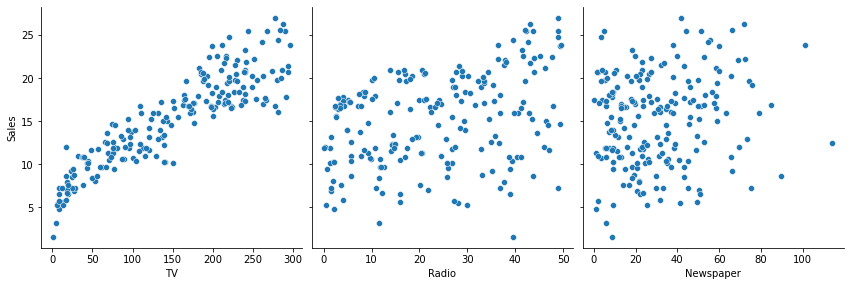

In [3]:
# visualize the relationship between the features and the target using scatterplots
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

Assumption #2: Little or no Multicollinearity between the features

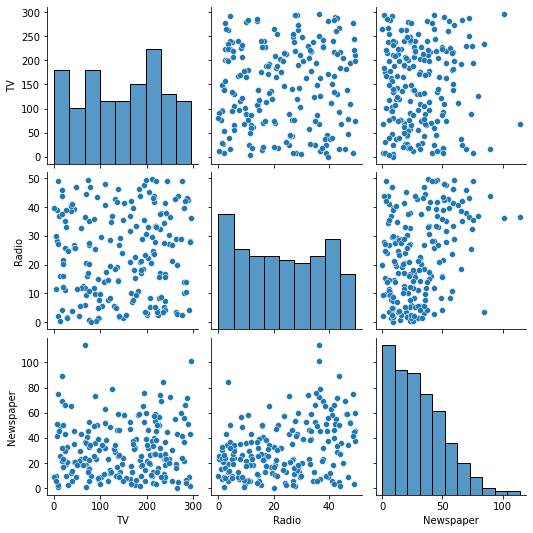

In [4]:
sns.pairplot(df[['TV','Radio','Newspaper']])

The above pair plot shows no significant relationship between the features.

<AxesSubplot:>

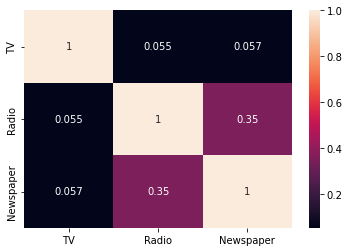

In [5]:
sns.heatmap(df[['TV','Radio','Newspaper']].corr(), annot = True)

This heatmap gives us the correlation coefficients of each feature with respect to one another which are less than 0.4. Thus the features aren’t highly correlated with each other.

<AxesSubplot:xlabel='TV', ylabel='Sales'>

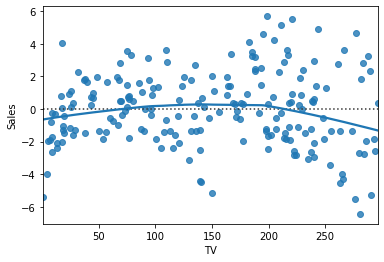

In [6]:
# This function will regress y on x and then draw a scatterplot of the residuals.

sns.residplot(x = df['TV'], y = df["Sales"], lowess = True)

In [7]:
Ststsmodels_model = smf.ols(formula='Sales ~ TV', data = df)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [8]:
# manually calculate the prediction
Sales = 6.97482149 + 0.05546477*50
Sales * 1000

9748.05999

In [9]:
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
Sales = Ststsmodels_result.predict(X_new)
Sales * 1000

0    9748.060012
dtype: float64

Thus, we predict Sales of 9,748 items in that market.

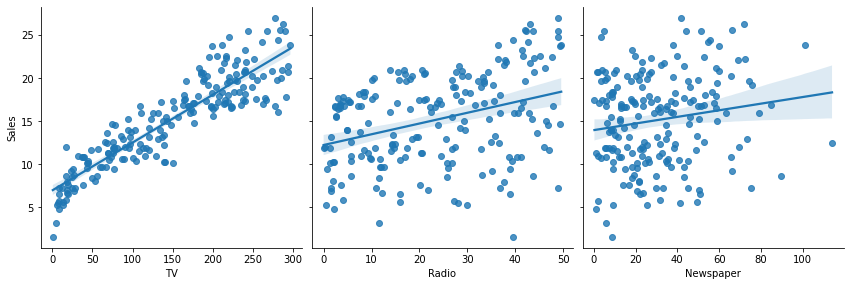

In [10]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg')

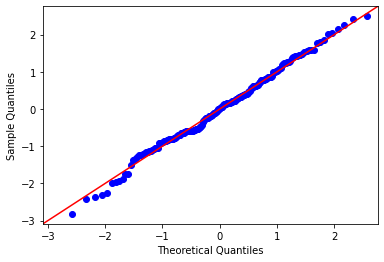

In [11]:
Ststsmodels_residual = Ststsmodels_result.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

In [12]:
# print the confidence intervals for the model coefficients
Ststsmodels_result.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


null hypothesis(H0): There is no relationship between TV ads and Sales

alternative hypothesis(H1): There is a relationship between TV ads and Sales

In [13]:
# print the p-values for the model coefficients
Ststsmodels_result.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

If the p-value is less than 0.05, we reject the null hypothesis.

p-value is less than 0.05.
Reject the null hypothesis.
There is a relationship between dependent and independent variable.
We generally ignore the p-value for the intercept.

In [14]:
# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           7.93e-74
Time:                        22:32:48   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assumption #5: Little or No autocorrelation in the residuals:

The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation. A value of 2.0 means that there is no autocorrelation detected in the sample.

Durbin-Watson: 2.029 from the above ols summary shows that there is no autocorrelation detected in the sample.

In [15]:
# print the R-squared value for the model

print(Ststsmodels_result.rsquared)

0.8121757029987414


In [17]:
# create a fitted model with all three features
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [18]:
# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           8.13e-99
Time:                        22:34:23   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For a given amount of Radio and Newspaper ad spending, an increase of Rs.1000 in TV ad spending is associated with an increase in Sales of 54.444 items.
TV and Radio have small p-values, whereas Newspaper have a large p-value
Reject the null hypothesis for TV and Radio, Fail to reject the null hypothesis for Newspaper
This model has a higher R-squared (0.903) than the previous model(0.812). This model provides a better fit to the data than a model that only includes TV.

In [20]:
#Keeping features in the model if they have small p-values, check corresponding  Adjusted R2  value.

# only include TV and Radio in the model

# instantiate and fit model
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio', data=df)
Ststsmodels_result = Ststsmodels_model.fit()

# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          2.39e-100
Time:                        22:36:08   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# exclude Newspaper
X = df[['TV', 'Radio']]
y = df.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.509248161866739


In [22]:
# include Newspaper
X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.509610929572584
